# Regressão Linear Múltipla

## Objetivo
Com este código, você irá:
- Estender o nosso modelo de regressão para que ele possa contemplar múltiplas características
    - Vamos estender a estrutura dos dados para contemplar múltiplas características
    - Reescrever a previsão, a função custo e o cálculo do gradiente para contemplar a possibilidade de múltiplas características
    - Utilizar a função `np.dot` para vetorizar nossa implementação, para simplificar o código e torná-lo mais rápido.

In [916]:
import math as math
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(precision=4, suppress=True)  # reduz a precisão das numpy arrays na hora de dar print

# Definição do Problema

Usaremos um exemplo de motivação baseado no problema de estimar o preço de uma casa.

Os dados de treinamento contêm três exemplos com quatro características (Área, quartos, andares e idade).  Note que a primeira característica possui uma ordem de grandeza muito maior que as demais. Isso causará um problema, mas nós resolveremos isso em códigos futuros.


| Área (sqft) | quartos  | andares | Idade | preço (milháres de dólares)  |   
| ----------------| ------------------- |----------------- |--------------|-------------- |  
| 2104            | 5                   | 1                | 45           | 460           |  
| 1416            | 3                   | 2                | 40           | 232           |  
| 852             | 2                   | 1                | 35           | 178           |  

Você irá construir um modelo de regressão linear usando esses valores de tal forma que você também possa depois estimar o preço de outras casas. Por exemplo, um casa com 1200 sqft, 3 quartos, 1 andares, 40 anos.  


In [917]:
X_trein = np.array([[2104, 5, 1, 45], [1416, 3, 2, 40], [852, 2, 1, 35]])
y_trein = np.array([460, 232, 178])

## Dando print na nossa matriz X, que contém nossos exemplos de treinamento

In [918]:
print(f"X Shape: {X_trein.shape}, X Type:{type(X_trein)})")
print(X_trein)
print(f"y Shape: {y_trein.shape}, y Type:{type(y_trein)})")
print(y_trein)

X Shape: (3, 4), X Type:<class 'numpy.ndarray'>)
[[2104    5    1   45]
 [1416    3    2   40]
 [ 852    2    1   35]]
y Shape: (3,), y Type:<class 'numpy.ndarray'>)
[460 232 178]


## Parâmetros $w$ e $b$

* $\mathbf{w}$ é um vetor com $n$ elementos.
  - Cada elemento contém um parâmetro associado a uma característica
  - Para o nosso conjunto de dados, $n$ é 4 (número de características)
  - $b$ é um parâmetro escalar (apenas um único número)


Para demonstração, $\mathbf{w}$ e $b$ serão carregados com um valor inicial que é próximo do ótimo. $\mathbf{w}$ é um vetor construído como sendo uma numpy array de 1 dimensão (1-D NumPy array).

In [919]:
b_inicial = 785.1811367994083
w_inicial = np.array([ 0.39133535, 18.75376741, -53.36032453, -26.42131618])
print(f"w_inicial shape: {w_inicial.shape}, b_inicial type: {type(b_inicial)}")

w_inicial shape: (4,), b_inicial type: <class 'float'>


# Previsão usando o Modelo com múltiplas características

A previsão do modelo com múltiplas características é dada pelo seguinte modelo linear:

$$ f_{\mathbf{w},b}(\mathbf{x}) =  w_0x_0 + w_1x_1 +... + w_{n-1}x_{n-1} + b \tag{1}$$

ou, usando uma notação vetorial:

$$ f_{\mathbf{w},b}(\mathbf{x}) = \mathbf{w} \cdot \mathbf{x} + b  \tag{2} $$

onde $\cdot$ é o produtor escalar (`dot product`)

Para demonstrar o produto escalar, iremos implementar a previsão usando (1) e (2).


## Usando (1) e um loop for


In [920]:
def previsao_usando_loop_for(x, w, b):
    """
    faz uma previsão usando loop for

    Args:
      x (ndarray): Shape (n,) -> exemplo contendo múltiplas características
      w (ndarray): Shape (n,) -> parâmetros w do modelo
      b (scalar):  parâmetro b do modelo

    retorna:
      p (scalar):  previsão
    """
    n = x.shape[0]
    p = 0
    for i in range(n):
        p_i = x[i] * w[i]
        p = p + p_i
    p = p + b
    return p

In [921]:
# pegando uma linha do nosso conjunto de dados
x_vetor = X_trein[0,:]
print(f"x_vetor shape {x_vetor.shape}, x_vec: {x_vetor}")

# fazendo previsão para essa casa
f_wb = previsao_usando_loop_for(x_vetor, w_inicial, b_inicial)
print(f"f_wb shape {f_wb.shape}, previsão: {f_wb}")

x_vetor shape (4,), x_vec: [2104    5    1   45]
f_wb shape (), previsão: 459.9999976194083


Note que o shape do `x_vetor` é 1-D com 4 elementos, ou seja, (4,). Já o resultado da previsão, `f_wb`, é um escalar.


## Usando (2) e o produto escalar para termos uma versão vetorizada

In [922]:
def previsao(x, w, b):
    """
    Argumentos da função:
      x (ndarray): Shape (n,) -> exemplo contendo múltiplas características
      w (ndarray): Shape (n,) -> parâmetros w do modelo
      b (escalar):  parâmetro b do modelo

    retorna:
      p (escalar):  previsão
    """
    p = np.dot(x, w) + b
    return p

In [923]:
# pegando uma linha do nosso conjunto de dados
x_vetor = X_trein[0,:]
print(f"x_vetor shape {x_vetor.shape}, x_vec: {x_vetor}")

# fazendo previsão para essa casa
f_wb = previsao(x_vetor, w_inicial, b_inicial)
print(f"f_wb shape {f_wb.shape}, previsão: {f_wb}")

x_vetor shape (4,), x_vec: [2104    5    1   45]
f_wb shape (), previsão: 459.99999761940825


Note que o resultado é igual ao obtido anteriormente, pois trata-se da mesma casa e do mesmo modelo de previsão. Entretanto, a implementação vetorizada (com redução de laços do tipo `for') é mais elegante e menos custosa computacionalmente.

# Calculando o custo quando o modelo possui múltiplas características
A função custo $J(\mathbf{w},b)$ quando temos múltiplas características é dada por:
$$J(\mathbf{w},b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})^2 \tag{3}$$
onde:
$$ f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = \mathbf{w} \cdot \mathbf{x}^{(i)} + b  \tag{4} $$


Diferentemente dos nossos códigos anteriores, agora $\mathbf{w}$ e $\mathbf{x}^{(i)}$ são vetores ao invés de escalares.

Abaixo encontram-se uma implementação das equações (3) and (4).

In [924]:
def calcula_custo(X, y, w, b):
    """
    Calcula o custo
    Argumentos da função:
      X (ndarray (m,n)): Dados, contendo m exemplos com n características
      y (ndarray (m,)) : valores alvo
      w (ndarray (n,)) : parâmetros w do modelo
      b (escalar)       : parâmetro b do modelo

    Retorna:
      custo (escalar): custo
    """
    m     = X.shape[0]
    custo = 0.0
    for i in range(m):
        f_wb_i = np.dot(X[i], w) + b           #(n,)(n,) = escalar (see np.dot)
        custo = custo + (f_wb_i - y[i])**2     # escalar
    custo = custo / (2 * m)                    # escalar
    return custo

In [925]:
# Calcula e mostra o custo usando os nossos parâmetros ótimos escolhidos previamente
custo = calcula_custo(X_trein, y_trein, w_inicial, b_inicial)
print(f'Custo com parâmetros ótimos: {custo}')

Custo com parâmetros ótimos: 1.5578904880036537e-12


**Resultado esperado**: 1.5578904045996674e-12

# Método do Gradiente com Múltiplas Variáveis

Método do Gradiente com Múltiplas Variáveis:

$$\begin{align*} \text{repetir}&\text{ até convergir:} \; \lbrace \newline\;
& w_j = w_j -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial w_j} \tag{5}  \; & \text{para j = 0..n-1}\newline
&b\ \ = b -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial b}  \newline \rbrace
\end{align*}$$

onde, n é o número de características, parâmetros $w_j$ e $b$ são atualizados simultaneamente e onde  

$$
\begin{align}
\frac{\partial J(\mathbf{w},b)}{\partial w_j}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})x_{j}^{(i)} \tag{6}  \\
\frac{\partial J(\mathbf{w},b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)}) \tag{7}
\end{align}
$$
* m é o número de amostras de treinamento no nosso conjunto de dados

    
*  $f_{\mathbf{w},b}(\mathbf{x}^{(i)})$ é a previsão feita pelo modelo, enquanto que $y^{(i)}$ é o valor alvo


## Calculando o gradiente

Abaixo encontra-se uma implementação para calcular as equações (6) e (7). Existe muitas formas para se implementar isso. Certifique-se que você compreendeu a implementação.
   

In [926]:
def calcula_gradiente(X, y, w, b):
    """
    Calcula Gradiente para Regressão Linear
    Argumentos:
      X (ndarray (m,n)): Dados, contendo m exemplos com n características
      y (ndarray (m,)) : valores alvo
      w (ndarray (n,)) : parâmetros w do modelo
      b (escalar)      : parâmetro b do modelo

    Retorna:
      dj_dw (ndarray (n,)): O gradiente da função custo com relação aos parâmetros w.
      dj_db (escalar):      O gradiente da função custo com relação ao parâmetro b.
    """
    m,n = X.shape           #(número de exemplos, número de características)
    dj_dw = np.zeros((n,))
    dj_db = 0.

    for i in range(m):
        erro = (np.dot(X[i], w) + b) - y[i]
        for j in range(n):
            dj_dw[j] = dj_dw[j] + erro * X[i, j]
        dj_db = dj_db + erro
    dj_dw = dj_dw / m
    dj_db = dj_db / m

    return dj_db, dj_dw

In [927]:
# Calcula e mostra o gradiente
tmp_dj_db, tmp_dj_dw = calcula_gradiente(X_trein, y_trein, w_inicial, b_inicial)
print(f'dj_db com valores iniciais para w,b: {tmp_dj_db}')
print(f'dj_dw com valores iniciais para w,b: \n {tmp_dj_dw}')

dj_db com valores iniciais para w,b: -1.673925169143331e-06
dj_dw com valores iniciais para w,b: 
 [-0.0027 -0.     -0.     -0.0001]


**Resultados Esperados**:   
dj_db com valores iniciais w,b: -1.6739251122999121e-06  
dj_dw com valores iniciais w,b:   
 [-2.73e-03 -6.27e-06 -2.22e-06 -6.92e-05]  

## Método do Gradiente com múltiplas características

A rotina a seguir implementa a equação (5)

In [928]:
def metodo_do_gradiente(X, y, w_in, b_in, calcula_custo, calcula_gradiente, alpha, num_iters):
    """
    Performa Método do Gradiente para aprender w e b. Atualiza w e b ao longo de
    num_iters iterações usando uma taxa de aprendizado alpha

    Argumentos da função:
      X (ndarray (m,n))   : Dados, contendo m exemplos com n características
      y (ndarray (m,))    : valores alvo
      w_in (ndarray (n,)) : valores iniciais dos parâmetros w do modelo
      b_in (escalar)      : valor inicial do parâmetro b do modelo
      calcula_custo       : função que calcula o custo
      calcula_gradiente   : função que calcula o gradiente
      alpha (float)       : taxa de aprendizado
      num_iters (int)     : Número de iterações para o método do gradiente

    Retorna:
      w (ndarray (n,)) : Valores atualizados para os parâmetros w
      b (scalar)       : Valores atualizado para o parâmetro b
      """

    # Valores históricos
    J_history = []
    w = w_in
    b = b_in

    for i in range(num_iters):

        # Calcula o gradiente
        dj_db,dj_dw = calcula_gradiente(X, y, w, b)

        # Atualiza os parâmetros
        w = w - alpha * dj_dw
        b = b - alpha * dj_db

        # Salva o custo
        if i<100000:      # prevent resource exhaustion
            J_history.append( calcula_custo(X, y, w, b))
        # Faz print de tempos em tempos
        if i% math.ceil(num_iters / 10) == 0:
            
            print(f"Iteração {i:4d}: Custo {J_history[-1]:8.2f}   ")

    return w, b, J_history # retorna valores finais e históricos

Na célula a seguir testamos a implementação

In [929]:
# inicializando parâmetros
w_inicial = np.zeros_like(w_inicial)
b_inicial = 0
# parâmetros para rodar o Método do Gradiente:
num_iters = 1000
alpha     = 5.0e-7
# Rodando o Método do gradiente
w_final, b_final, J_hist = metodo_do_gradiente(X_trein, y_trein, w_inicial, b_inicial,
                                                    calcula_custo, calcula_gradiente,
                                                    alpha, num_iters)
print(f"b,w encontrados pelo método do gradiente: {b_final:0.2f},{w_final} ")
m,_ = X_trein.shape
for i in range(m):
    print(f"previsão: {np.dot(X_trein[i], w_final) + b_final:0.2f}, valor alvo: {y_trein[i]}")

Iteração    0: Custo  2529.46   
Iteração  100: Custo   695.99   
Iteração  200: Custo   694.92   
Iteração  300: Custo   693.86   
Iteração  400: Custo   692.81   
Iteração  500: Custo   691.77   
Iteração  600: Custo   690.73   
Iteração  700: Custo   689.71   
Iteração  800: Custo   688.70   
Iteração  900: Custo   687.69   
b,w encontrados pelo método do gradiente: -0.00,[ 0.204   0.0037 -0.0112 -0.0659] 
previsão: 426.19, valor alvo: 460
previsão: 286.17, valor alvo: 232
previsão: 171.47, valor alvo: 178


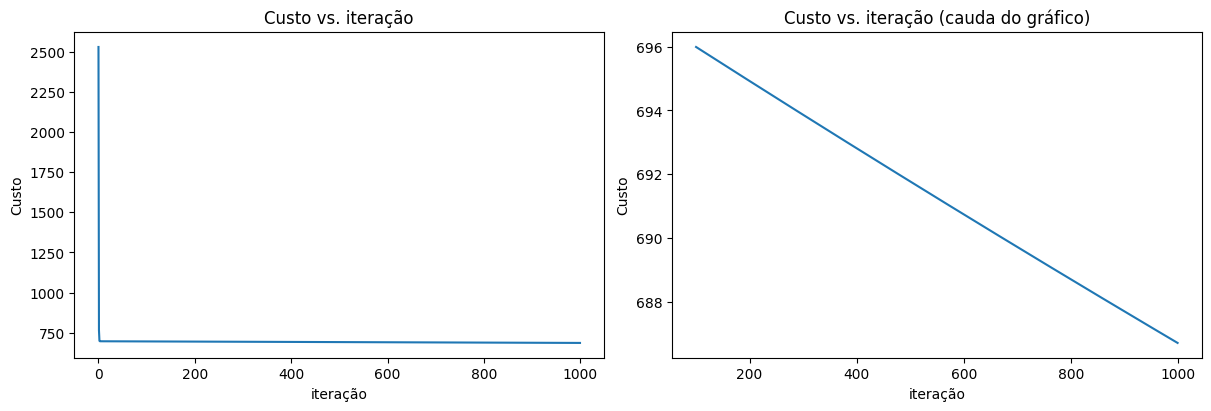

In [930]:
# Plotando os resultados
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 4))
ax1.plot(J_hist)
ax2.plot(100 + np.arange(len(J_hist[100:])), J_hist[100:])
ax1.set_title("Custo vs. iteração");  ax2.set_title("Custo vs. iteração (cauda do gráfico)")
ax1.set_ylabel('Custo')             ;  ax2.set_ylabel('Custo')
ax1.set_xlabel('iteração')   ;  ax2.set_xlabel('iteração')
plt.show()

*Estes resultados ainda não são os melhores*! O custo ainda está caindo e nossas previsões não estão tão precisas. No próximo código nós vamos descobrir como melhorar isso.

# Parabéns!
Com este código você:
- Redesenvolveu as rotinas para Regressão Linear, agora com múltiplas variáveis.
- Utilizou NumPy `np.dot` para vetorizar as implementações

## Happy Hour - Testando outros algoritmos só pra comparar como fizemos na aula 05

Algoritmos implementados:
- RMSProp
- SGD (Gradiente Estocástico)
- Gradiente Conjugado
- Adam

### **Método RMSProp**

O **RMSProp** (Root Mean Square Propagation) é um algoritmo de otimização baseado no método de gradiente descendente, projetado para resolver algumas limitações de técnicas mais simples, como o Gradiente Descendente Estocástico (SGD). Ele foi proposto por Geoffrey Hinton em uma palestra e é especialmente útil em problemas de redes neurais profundas, onde a convergência pode ser lenta ou inconstante.

#### **Intuição**
O RMSProp tenta lidar com dois problemas comuns no gradiente descendente:
1. **Oscilações no gradiente**: O RMSProp reduz oscilações indesejadas em direções de alta curvatura da função de custo (frequentemente observadas ao longo de eixos de inclinação íngreme).
2. **Taxa de aprendizado adaptativa**: Diferente de métodos clássicos, o RMSProp ajusta a taxa de aprendizado de forma dinâmica para cada parâmetro com base na magnitude recente dos gradientes.

#### **Parte Matemática**
No RMSProp, ao invés de usar diretamente o gradiente $\nabla J(\theta)$ para atualizar os parâmetros $\theta$, o algoritmo introduz uma forma de controlar a magnitude dos passos com base na média quadrática móvel dos gradientes.

Aqui estão as equações matemáticas que descrevem o algoritmo:

1. **Cálculo da média exponencial dos quadrados dos gradientes**:
   
   $
   E[g^2]_t = \beta E[g^2]_{t-1} + (1 - \beta) g_t^2
   $
   Onde:
   - $g_t$ é o gradiente no tempo $t$.
   - $\beta$ é um parâmetro de decaimento (para a maior parte das aplicações um valor de 0.9).
   - $E[g^2]_t$ é a média exponencial do quadrado dos gradientes até o tempo $t$.

3. **Atualização dos parâmetros**:

   $
   \theta_{t+1} = \theta_t - \frac{\alpha}{\sqrt{E[g^2]_t + \epsilon}} g_t
   $
   Onde:
   - $\alpha$ é a taxa de aprendizado.
   - $\epsilon$ é um valor pequeno adicionado para evitar divisões por zero (tipicamente $10^{-8}$).
   - A divisão pelo termo $\sqrt{E[g^2]_t + \epsilon}$ ajusta a taxa de aprendizado para cada parâmetro de acordo com a magnitude recente de seus gradientes.

#### **Vantagens do RMSProp**

   - **Taxa de aprendizado adaptativa:** O RMSProp ajusta a taxa de aprendizado para cada parâmetro individualmente, o que facilita a convergência e ajuda a evitar grandes oscilações.
   - **Bom desempenho em redes profundas:** Funciona bem em redes neurais profundas, onde o gradiente pode variar bastante para diferentes parâmetros.
#### **Desvantagens do RMSProp**

   - **Dificuldade em Ajustar a Taxa de Decaimento:** O parâmetro de decaimento exponencial, que controla o quanto o gradiente é suavizado ao longo do tempo, pode ser sensível e difícil de ajustar corretamente para diferentes problemas. Uma escolha inadequada pode levar a uma convergência lenta ou até impedir a convergência.

   - **Estagnação em Mínimos Locais:** Como o RMSProp ajusta a taxa de aprendizado com base nas médias dos gradientes passados, pode acabar ficando preso em mínimos locais ou em regiões onde os gradientes são muito pequenos.

   - **Pode Precisar de Ajuste Adicional:** Embora o RMSProp forneça taxas de aprendizado adaptativas, ainda pode ser necessário ajustar o valor inicial da taxa de aprendizado global para obter bons resultados em alguns problemas.

In [931]:
def rmsprop(X, y, w_in, b_in, alpha, num_iters, calcula_custo, calcula_gradiente, beta=0.9, epsilon=1e-8):
    """
    Aplica o método RMSProp para ajustar w, b para problemas multivariados.

    Argumentos da função:
      X (ndarray (m, n))  : Conjunto de dados com m exemplos e n características
      y (ndarray (m,))    : Valores alvo de saída
      w_in (ndarray (n,)) : Valores iniciais para os parâmetros w (vetor)
      b_in (escalar)      : Valor inicial para o parâmetro b
      alpha (float)       : Taxa de aprendizado
      num_iters (int)     : Número de iterações
      calcula_custo       : Função para calcular o custo
      calcula_gradiente   : Função para calcular o gradiente
      beta (float)        : Fator de decaimento para RMSProp (geralmente próximo de 0.9)
      epsilon (float)     : Pequeno valor para evitar divisão por zero no cálculo do gradiente (geralmente 1e-8)

    Retorna:
      w (ndarray (n,))    : Valor atualizado de w
      b (scalar)          : Valor atualizado de b
      J_history (list)    : Histórico dos valores de custo
    """

    # Inicializar variáveis
    J_history = []
    w = w_in
    b = b_in
    
    # Inicialização de acumuladores de gradiente como vetores do tamanho de w
    v_dw = np.zeros_like(w)  # Vetor do mesmo tamanho que w
    v_db = 0  # b é escalar

    for i in range(num_iters):
        # Calcula o gradiente
        dj_db, dj_dw = calcula_gradiente(X, y, w, b)

        # Atualiza os acumuladores RMSProp para w e b (element-wise para w)
        v_dw = beta * v_dw + (1 - beta) * (dj_dw**2)
        v_db = beta * v_db + (1 - beta) * (dj_db**2)

        # Atualiza os parâmetros w e b
        w = w - alpha * dj_dw / (np.sqrt(v_dw) + epsilon)
        b = b - alpha * dj_db / (np.sqrt(v_db) + epsilon)

        # Armazena o custo para cada iteração
        J_history.append(calcula_custo(X, y, w, b))
        
        # Exibe o progresso em intervalos regulares
        if i % (num_iters // 10) == 0 or i == num_iters - 1:
            print(f"Iteração {i:4d}: Custo {J_history[-1]:8.2f}")

    return w, b, J_history




### **Gradiente Descendente Estocástico (SGD)**

O **Gradiente Descendente Estocástico (SGD)** é uma variante do método de gradiente descendente que atualiza os parâmetros do modelo utilizando apenas um subconjunto (ou uma única amostra) do conjunto de dados a cada iteração. Essa abordagem pode resultar em uma convergência mais rápida, especialmente em grandes conjuntos de dados.

#### **Intuição**

O gradiente descendente tradicional utiliza a média de todos os gradientes das amostras para atualizar os parâmetros, o que pode ser computacionalmente custoso para grandes conjuntos de dados. O SGD, por outro lado, escolhe aleatoriamente uma amostra ou um mini-lote de amostras para calcular a atualização do parâmetro, permitindo que o algoritmo comece a atualizar os parâmetros imediatamente, o que pode acelerar a convergência e ajudar a escapar de mínimos locais.

##### **Parte Matemática**

A atualização dos parâmetros $\theta$ no SGD é dada pela seguinte fórmula:

$
\theta_{t+1} = \theta_t - \alpha \nabla J(\theta_t; x^{(i)}, y^{(i)})
$

Onde:
- $\theta_t$ é o vetor de parâmetros na iteração $t$,
- $\alpha$ é a taxa de aprendizado,
- $\nabla J(\theta_t; x^{(i)}, y^{(i)})$ é o gradiente da função de custo calculado para a amostra $(x^{(i)}, y^{(i)})$.

#### **Vantagens do SGD**

1. **Eficiência Computacional**: O SGD é muito mais rápido que o gradiente descendente padrão em grandes conjuntos de dados, pois utiliza apenas uma amostra (ou um pequeno lote) para cada atualização.
2. **Capacidade de Escapar de Mínimos Locais**: A natureza estocástica do SGD pode ajudar a escapar de mínimos locais, uma característica especialmente útil em funções de custo não convexas.

#### **Desvantagens do SGD**

1. **Oscilações**: As atualizações estocásticas podem causar oscilações na função de custo, dificultando a convergência em um mínimo global.
2. **Escolha da Taxa de Aprendizado**: A escolha da taxa de aprendizado pode ser crítica; uma taxa muito alta pode levar a uma divergência, enquanto uma taxa muito baixa pode resultar em uma convergência muito lenta.


In [932]:

def sgd(X, y, w_in, b_in, alpha, num_iters, calcula_custo, calcula_gradiente):
    """
    Aplica o Método do Gradiente Estocástico (SGD) para ajustar w, b.

    Argumentos da função:
      X (ndarray (m, n))   : Conjunto de dados com m exemplos e n características
      y (ndarray (m,))     : Valores alvo de saída
      w_in (ndarray (n,))  : Valores iniciais para os parâmetros w (vetor)
      b_in (scalar)        : Valor inicial para o parâmetro b
      alpha (float)        : Taxa de aprendizado
      num_iters (int)      : Número de iterações
      calcula_custo        : Função para calcular o custo
      calcula_gradiente    : Função para calcular o gradiente

    Retorna:
      w (ndarray (n,))     : Valor atualizado de w
      b (scalar)           : Valor atualizado de b
      J_history (list)     : Histórico dos valores de custo
    """

    # Inicializar variáveis
    J_history = []
    b = b_in
    w = w_in
    m = len(y)  # Número de amostras

    for i in range(num_iters):
        # Embaralhar os dados a cada iteração
        indices = np.random.permutation(m)
        X_shuffled = X[indices]
        y_shuffled = y[indices]

        # Atualiza w e b para cada exemplo de treinamento
        for j in range(m):
            # Seleciona uma única amostra (vetor de características e valor alvo)
            x_i = X_shuffled[j]   # Vetor (n,)
            y_i = y_shuffled[j]   # Escalar

            # Calcula o gradiente para essa amostra
            dj_db, dj_dw = calcula_gradiente(x_i.reshape(1, -1), np.array([y_i]), w, b)

            # Atualiza os parâmetros w e b
            w = w - alpha * dj_dw
            b = b - alpha * dj_db

        # Armazena o custo após a passagem por todo o conjunto de dados
        J_history.append(calcula_custo(X, y, w, b))

        # Exibe o progresso em intervalos regulares
        if i % (num_iters // 10) == 0 or i == num_iters - 1:
            print(f"Iteração {i:4d}: Custo {J_history[-1]:8.2f}")

    return w, b, J_history


### **Método de Gradiente Conjugado**

O **Método de Gradiente Conjugado** é uma técnica eficiente para resolver sistemas de equações lineares e minimizar funções quadráticas. Ele é amplamente utilizado em otimização, especialmente quando o número de parâmetros é grande, pois evita a necessidade de calcular a matriz Hessiana (que pode ser muito custosa em termos computacionais).

Neste caso, aplicamos o **Gradiente Conjugado** para ajustar os parâmetros $w$ e $b$ de um modelo de regressão linear. O método explora as propriedades da função de custo para determinar a direção ótima de descida a cada iteração, buscando melhorar a velocidade de convergência em comparação ao gradiente descendente comum.

#### **Descrição do Algoritmo**

1. **Inicialização**:
    - Definimos os valores iniciais de $w$ e $b$ como $w_{in}$ e $b_{in}$, que serão ajustados pelo algoritmo.
    - Os gradientes anteriores ($g_{prev_w}$, $g_{prev_b}$) são inicializados como $0$, assim como as direções conjugadas ($p_w$, $p_b$).

2. **Cálculo do Gradiente**:
    - Em cada iteração, calculamos o gradiente da função de custo em relação a $w$ e $b$ usando a função **calcula_gradiente**.

3. **Critério de Parada**:
    - Se a norma do gradiente for menor que um limiar definido ($tol$), o algoritmo para, indicando que a convergência foi atingida.

4. **Atualização da Direção Conjugada**:
    - Na primeira iteração, a direção de descida é definida como o negativo do gradiente.
    - Em iterações subsequentes, calculamos o fator $\beta_t$ (Polak-Ribiére), que ajusta a nova direção de descida em função da direção anterior, de forma que as direções permaneçam conjugadas.

5. **Busca Linear e Atualização**:
    - A cada iteração, atualizamos $w$ e $b$ na direção conjugada calculada, com um passo de tamanho $\alpha$.

6. **Histórico de Custo**:
    - Armazenamos o valor do custo em cada iteração para monitorar o progresso da otimização.

In [933]:
def gradiente_conjugado(x, y, w_in, b_in, alpha, num_iters, calcula_custo, calcula_gradiente, tol=1e-40):
    """
    Método de Gradiente Conjugado para ajuste de w e b.

    Argumentos:
      x (ndarray (m, n))  : Conjunto de dados com m amostras e n características
      y (ndarray (m,))    : Valores alvo de saída
      w_in (ndarray (n,)) : Vetor inicial para os parâmetros w
      b_in (scalar)       : Valor inicial para o parâmetro b
      alpha (float)       : Tamanho de passo ou taxa de aprendizado
      num_iters (int)     : Número de iterações
      calcula_custo       : Função para calcular o custo
      calcula_gradiente   : Função para calcular o gradiente
      tol (float)         : Tolerância para critério de parada

    Retorna:
      w (ndarray (n,))    : Valor atualizado de w
      b (scalar)          : Valor atualizado de b
      J_history (list)    : Histórico dos valores de custo
    """
    w = w_in
    b = b_in
    J_history = []

    g_prev_w = np.zeros(len(w))
    g_prev_b = 0
    p_w = -g_prev_w  # Inicializa como negativo do gradiente
    p_b = -g_prev_b

    for t in range(1, num_iters + 1):
        # Calcula o gradiente para w e b
        dj_db, dj_dw = calcula_gradiente(x, y, w, b)

        # Critério de parada baseado na norma do gradiente
        if np.sqrt(np.sum(dj_dw ** 2)) < tol and abs(dj_db) < tol:
            print(f"Convergência atingida na iteração {t}.")
            break

        # Primeira iteração - p inicial é o negativo do gradiente
        if t == 1:
            p_w = -dj_dw
            p_b = -dj_db
        else:
            # Computa beta_t usando o método Polak-Ribiére
            if np.dot(g_prev_w, g_prev_w) != 0:  # Prevenir divisão por zero
                beta_t = np.dot(dj_dw, dj_dw - g_prev_w) / np.dot(g_prev_w, g_prev_w)
            else:
                beta_t = 0  # Ou outra abordagem
            
            p_w = -dj_dw + beta_t * p_w
            p_b = -dj_db + beta_t * p_b

        # Atualiza os parâmetros
        w += alpha * p_w
        b += alpha * p_b

        # Calcula o custo e armazena no histórico
        J_history.append(calcula_custo(x, y, w, b))

        # Atualiza o gradiente anterior
        g_prev_w = dj_dw
        g_prev_b = dj_db

        # Exibe o progresso em intervalos regulares
        if t % (num_iters // 10) == 0 or t == num_iters:
            print(f"Iteração {t:4d}: Custo {J_history[-1]:8.2f}")

    return w, b, J_history


### **Algoritmo Adam (Adaptive Moment Estimation)**

O algoritmo **Adam** combina as ideias dos métodos de **Momentum** e **RMSProp** para realizar uma atualização adaptativa dos parâmetros durante a otimização. Ele ajusta a taxa de aprendizado de cada parâmetro individualmente, com base em estimativas de momentos de primeira e segunda ordem.

#### **Etapas do Algoritmo**

1. **Inicialização**:
   - Inicializa os momentos $m_w, m_b, v_w, v_b$ como zeros, onde:
     - $m_w, m_b$ são as médias móveis exponenciais dos gradientes para os parâmetros $w$ e $b$.
     - $v_w, v_b$ são as médias móveis exponenciais dos quadrados dos gradientes.
   - Define os hiperparâmetros: taxa de aprendizado $\alpha$, decaimentos $\beta_1, \beta_2$ e um pequeno valor $\epsilon$ para evitar divisão por zero (estabilização numérica).

2. **Atualização dos Momentos**:

   - A cada iteração, atualiza as médias móveis dos gradientes:
    
     $
     m_w = \beta_1 m_w + (1 - \beta_1) \cdot \nabla J(w)
     $

     $
     m_b = \beta_1 m_b + (1 - \beta_1) \cdot \nabla J(b)
     $
     
   - Atualiza as médias móveis dos quadrados dos gradientes:

     $
     v_w = \beta_2 v_w + (1 - \beta_2) \cdot \left( \nabla J(w) \right)^2
     $

     $
     v_b = \beta_2 v_b + (1 - \beta_2) \cdot \left( \nabla J(b) \right)^2
     $

3. **Correção de Bias**:
   - Como $m_w$, $m_b$, $v_w$ e $v_b$ estão inicialmente tendenciosos em direção a zero nas primeiras iterações, faz-se a correção de tendência:

     $
     m_w^{\text{corrigido}} = \frac{m_w}{1 - \beta_1^t}, \quad m_b^{\text{corrigido}} = \frac{m_b}{1 - \beta_1^t}
     $

     $
     v_w^{\text{corrigido}} = \frac{v_w}{1 - \beta_2^t}, \quad v_b^{\text{corrigido}} = \frac{v_b}{1 - \beta_2^t}
     $

4. **Atualização dos Parâmetros**:
   - Finalmente, os parâmetros $w$ e $b$ são atualizados de acordo com as médias corrigidas e os quadrados dos gradientes:

     $
     w = w - \alpha \cdot \frac{m_w^{\text{corrigido}}}{\sqrt{v_w^{\text{corrigido}}} + \epsilon}
     $

     $
     b = b - \alpha \cdot \frac{m_b^{\text{corrigido}}}{\sqrt{v_b^{\text{corrigido}}} + \epsilon}
     $

### Hiperparâmetros do Adam

- $\alpha$ : Taxa de aprendizado (comumente $0.001$).
- $\beta_1$ : Exponencial para a média dos gradientes (geralmente $0.9$).
- $\beta_2$ : Exponencial para a média dos gradientes ao quadrado (geralmente $0.999$).
- $\epsilon$ : Pequeno valor para evitar divisão por zero (geralmente $10^{-8}$).

### Vantagens do Adam

- **Taxa de aprendizado adaptativa**: O Adam ajusta automaticamente a taxa de aprendizado para cada parâmetro, o que torna o algoritmo mais robusto em diferentes tipos de problemas.
- **Combinação de Momentos**: Aproveita a média dos gradientes (momentum) e as variâncias dos gradientes (RMSProp), combinando os benefícios dos dois métodos.
- **Desempenho em Redes Neurais**: Funciona bem em redes neurais profundas e problemas onde o gradiente pode variar muito entre parâmetros.


In [934]:
def adam(x, y, w_in, b_in, alpha, beta1, beta2, epsilon, num_iters, calcula_custo, calcula_gradiente):
    """
    Aplica o algoritmo Adam para otimização de w e b em um cenário multivariado.

    Argumentos:
      x (ndarray): Conjunto de dados com m amostras e n características.
      y (ndarray): Valores alvo de saída.
      w_in (ndarray): Valores iniciais para os parâmetros w (vetor de pesos).
      b_in (scalar): Valor inicial para o parâmetro b (intercepto).
      alpha (float): Taxa de aprendizado.
      beta1 (float): Exponencial para a média dos gradientes.
      beta2 (float): Exponencial para a média dos gradientes ao quadrado.
      epsilon (float): Pequeno valor para evitar divisão por zero.
      num_iters (int): Número total de iterações.
      calcula_custo: Função que calcula o custo.
      calcula_gradiente: Função que calcula o gradiente.

    Retorna:
      w (ndarray): Valor otimizado de w (vetor de pesos).
      b (scalar): Valor otimizado de b (intercepto).
      J_history (list): Histórico dos valores de custo.
    """
    w = w_in
    b = b_in
    m_w, v_w = np.zeros_like(w), np.zeros_like(w)  # Inicialização dos momentos de w
    m_b, v_b = 0, 0  # Inicialização dos momentos de b

    J_history = []

    for t in range(1, num_iters + 1):
        # Calcula o gradiente
        dj_db, dj_dw = calcula_gradiente(x, y, w, b)

        # Atualiza as médias e variâncias dos gradientes (momentos)
        m_w = beta1 * m_w + (1 - beta1) * dj_dw
        m_b = beta1 * m_b + (1 - beta1) * dj_db

        v_w = beta2 * v_w + (1 - beta2) * (dj_dw ** 2)
        v_b = beta2 * v_b + (1 - beta2) * (dj_db ** 2)

        # Correções de bias
        m_w_corrigido = m_w / (1 - beta1 ** t)
        m_b_corrigido = m_b / (1 - beta1 ** t)
        v_w_corrigido = v_w / (1 - beta2 ** t)
        v_b_corrigido = v_b / (1 - beta2 ** t)

        # Atualiza os parâmetros
        w -= alpha * (m_w_corrigido / (np.sqrt(v_w_corrigido) + epsilon))
        b -= alpha * (m_b_corrigido / (np.sqrt(v_b_corrigido) + epsilon))

        # Armazena o custo atual
        J_history.append(calcula_custo(x, y, w, b))
        
        # Exibe o progresso em intervalos regulares
        if t % (num_iters // 10) == 0 or t == num_iters:
            print(f"Iteração {t:4d}: Custo {J_history[-1]:8.2f}   ")

    return w, b, J_history


### Parte Prática

#### Rodando o RMSProp

In [935]:
# inicializando parâmetros
w_inicial = np.zeros_like(w_inicial)
b_inicial = 0
# parâmetros para rodar o Método do Gradiente:
num_iters = 1000
alpha     = 1e-3
# Rodando o Método do gradiente
w_final, b_final, J_hist = rmsprop(X_trein, y_trein, w_inicial, b_inicial, alpha, num_iters,
                                                    calcula_custo, calcula_gradiente)
print(f"b,w encontrados pelo método RMSProp: {b_final:0.2f},{w_final} ")
m,_ = X_trein.shape
for i in range(m):
    print(f"previsão: {np.dot(X_trein[i], w_final) + b_final:0.2f}, valor alvo: {y_trein[i]}")

Iteração    0: Custo 47960.52
Iteração  100: Custo 11467.14
Iteração  200: Custo   857.57
Iteração  300: Custo   715.12
Iteração  400: Custo   697.17
Iteração  500: Custo   680.08
Iteração  600: Custo   664.05
Iteração  700: Custo   649.07
Iteração  800: Custo   635.14
Iteração  900: Custo   622.25
Iteração  999: Custo   610.53
b,w encontrados pelo método RMSProp: -0.57,[ 0.2145  0.8887 -0.6237 -0.5506] 
previsão: 429.83, valor alvo: 460
previsão: 282.59, valor alvo: 232
previsão: 164.09, valor alvo: 178


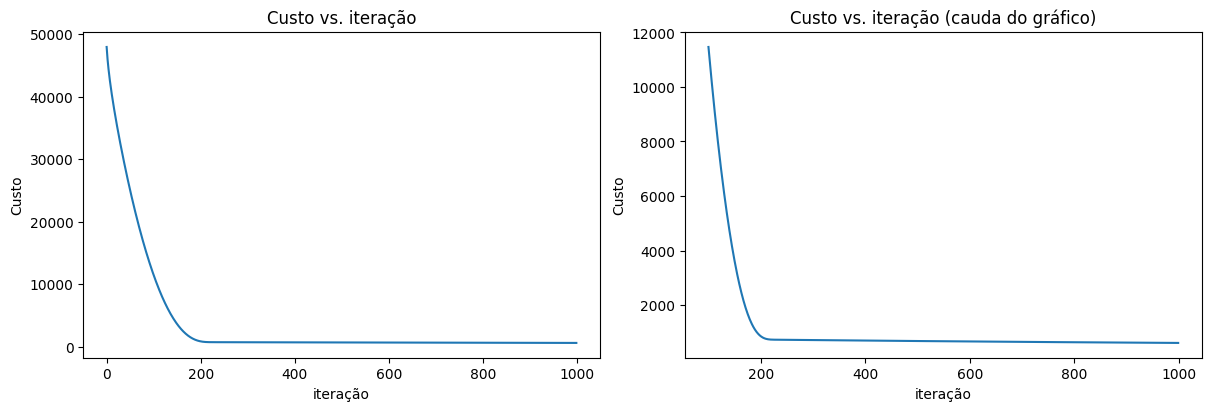

In [936]:
# Plotando os resultados
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 4))
ax1.plot(J_hist)
ax2.plot(100 + np.arange(len(J_hist[100:])), J_hist[100:])
ax1.set_title("Custo vs. iteração");  ax2.set_title("Custo vs. iteração (cauda do gráfico)")
ax1.set_ylabel('Custo')             ;  ax2.set_ylabel('Custo')
ax1.set_xlabel('iteração')   ;  ax2.set_xlabel('iteração')
plt.show()

#### Rodando o SGD

In [937]:
# inicializando parâmetros
w_inicial = np.zeros_like(w_inicial)
b_inicial = 0
# parâmetros para rodar o Método do Gradiente:
num_iters = 1000
alpha     = 1e-9
# Rodando o Método do gradiente
w_final, b_final, J_hist = sgd(X_trein, y_trein, w_inicial, b_inicial, alpha, num_iters,
                                                    calcula_custo, calcula_gradiente)
print(f"b,w encontrados pelo método SGD: {b_final:0.2f},{w_final} ")
m,_ = X_trein.shape
for i in range(m):
    print(f"previsão: {np.dot(X_trein[i], w_final) + b_final:0.2f}, valor alvo: {y_trein[i]}")

Iteração    0: Custo 48822.57
Iteração  100: Custo 12156.42
Iteração  200: Custo  3425.44
Iteração  300: Custo  1346.52
Iteração  400: Custo   851.59
Iteração  500: Custo   733.76
Iteração  600: Custo   705.73
Iteração  700: Custo   699.10
Iteração  800: Custo   697.51
Iteração  900: Custo   697.13
Iteração  999: Custo   697.04
b,w encontrados pelo método SGD: 0.00,[0.202  0.0005 0.0001 0.0047] 
previsão: 425.30, valor alvo: 460
previsão: 286.27, valor alvo: 232
previsão: 172.30, valor alvo: 178


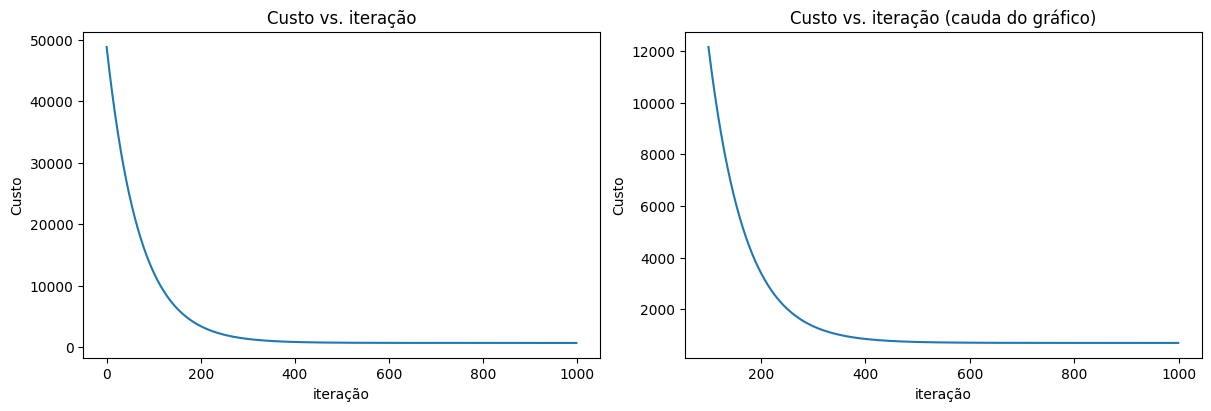

In [938]:
# Plotando os resultados
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 4))
ax1.plot(J_hist)
ax2.plot(100 + np.arange(len(J_hist[100:])), J_hist[100:])
ax1.set_title("Custo vs. iteração");  ax2.set_title("Custo vs. iteração (cauda do gráfico)")
ax1.set_ylabel('Custo')             ;  ax2.set_ylabel('Custo')
ax1.set_xlabel('iteração')   ;  ax2.set_xlabel('iteração')
plt.show()

### Rodando o Gradiente Conjugado

In [939]:
# inicializando parâmetros
w_inicial = np.zeros_like(w_inicial)
b_inicial = 0
# parâmetros para rodar o Método do Gradiente:
num_iters = 3000
alpha     = 1e-9
# Rodando o Método do gradiente
w_final, b_final, J_hist = gradiente_conjugado(X_trein, y_trein, w_inicial, b_inicial, alpha, num_iters,
                                                    calcula_custo, calcula_gradiente)
print(f"b,w encontrados pelo método Gradiente Conjugado: {b_final:0.2f},{w_final} ")
m,_ = X_trein.shape
for i in range(m):
    print(f"previsão: {np.dot(X_trein[i], w_final) + b_final:0.2f}, valor alvo: {y_trein[i]}")

Iteração  300: Custo 12371.09
Iteração  600: Custo  3488.58
Iteração  900: Custo  1364.57
Iteração 1200: Custo   856.67
Iteração 1500: Custo   735.22
Iteração 1800: Custo   706.17
Iteração 2100: Custo   699.22
Iteração 2400: Custo   697.55
Iteração 2700: Custo   697.15
Iteração 3000: Custo   697.05
b,w encontrados pelo método Gradiente Conjugado: 0.00,[0.202  0.0005 0.0001 0.0047] 
previsão: 425.26, valor alvo: 460
previsão: 286.25, valor alvo: 232
previsão: 172.29, valor alvo: 178


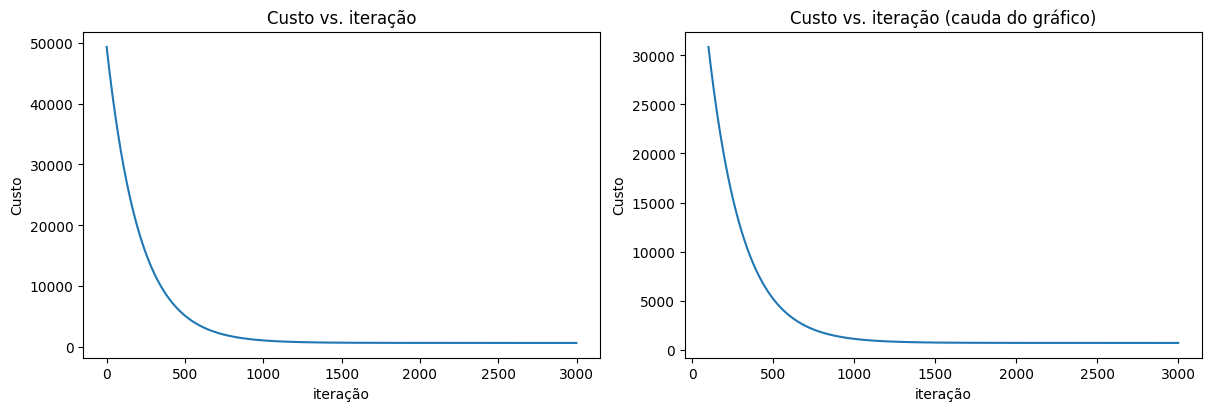

In [940]:
# Plotando os resultados
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 4))
ax1.plot(J_hist)
ax2.plot(100 + np.arange(len(J_hist[100:])), J_hist[100:])
ax1.set_title("Custo vs. iteração");  ax2.set_title("Custo vs. iteração (cauda do gráfico)")
ax1.set_ylabel('Custo')             ;  ax2.set_ylabel('Custo')
ax1.set_xlabel('iteração')   ;  ax2.set_xlabel('iteração')
plt.show()

### Rodando o Adam

In [941]:
# inicializando parâmetros
w_inicial = np.zeros_like(w_inicial)
b_inicial = 0
# parâmetros para rodar o Método do Gradiente:
num_iters = 3000
alpha  = 0.1
beta1 = 0.9
beta2 = 0.999
epsilon = 1e-8
# Rodando o Método do gradiente
w_final, b_final, J_hist = adam(X_trein, y_trein, w_inicial, b_inicial, alpha, beta1, beta2, epsilon, num_iters,
                                                    calcula_custo, calcula_gradiente)
print(f"b,w encontrados pelo método Adam: {b_final:0.2f},{w_final} ")
m,_ = X_trein.shape
for i in range(m):
    print(f"previsão: {np.dot(X_trein[i], w_final) + b_final:0.2f}, valor alvo: {y_trein[i]}")

Iteração  300: Custo   449.64   
Iteração  600: Custo   309.70   
Iteração  900: Custo   190.65   
Iteração 1200: Custo   103.67   
Iteração 1500: Custo    49.36   
Iteração 1800: Custo    20.25   
Iteração 2100: Custo     7.00   
Iteração 2400: Custo     1.98   
Iteração 2700: Custo     0.45   
Iteração 3000: Custo     0.08   
b,w encontrados pelo método Adam: 4.58,[  0.1847  10.9479 -69.2482   1.8012] 
previsão: 459.78, valor alvo: 460
previsão: 232.54, valor alvo: 232
previsão: 177.65, valor alvo: 178


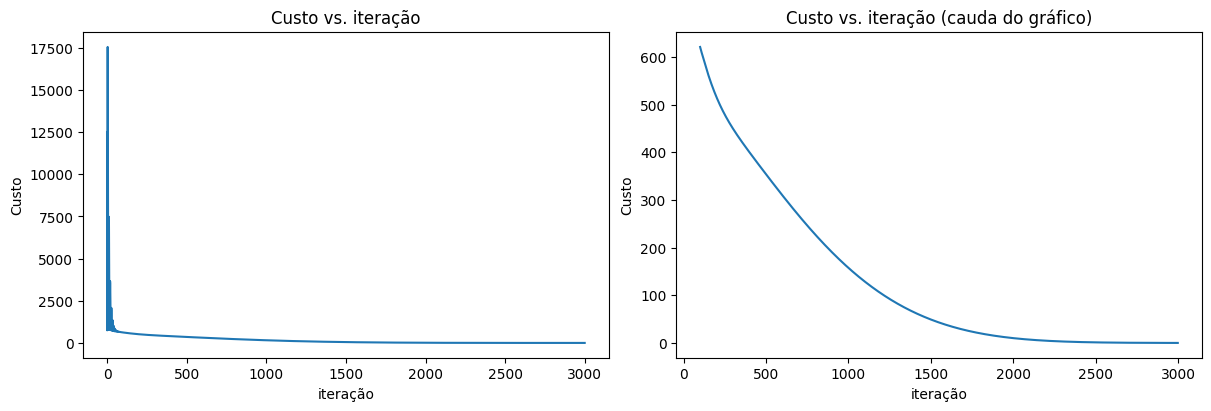

In [942]:
# Plotando os resultados
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 4))
ax1.plot(J_hist)
ax2.plot(100 + np.arange(len(J_hist[100:])), J_hist[100:])
ax1.set_title("Custo vs. iteração");  ax2.set_title("Custo vs. iteração (cauda do gráfico)")
ax1.set_ylabel('Custo')             ;  ax2.set_ylabel('Custo')
ax1.set_xlabel('iteração')   ;  ax2.set_xlabel('iteração')
plt.show()

Serpa que sem querer tropecei numa solução melhor? rs